In [ ]:
#data :

In [4]:
import pandas as pd



un_edit_date_list=[d.strftime('%Y%m%d') for d in pd.date_range('20220101','20221013')] #YYYYMMDD
date_list=[]
for i in un_edit_date_list:
    j=str(i)
    x=(j[:4])+"-"+(j[4:6])+"-"+(j[6:])
    date_list.append(x)


In [2]:
df=pd.DataFrame()

web_link=f"https://archive.analytics.mybinder.org/events-{date_list[-1]}.jsonl"
temp = pd.read_json(web_link, lines=True)
temp2=temp.loc[temp['spec']=='weix1996/lectures/HEAD']
df = df.reindex(columns=temp.columns.to_list())


for i in date_list:
    web_link=f"https://archive.analytics.mybinder.org/events-{i}.jsonl"
    temp = pd.read_json(web_link, lines=True)
    
    temp2=(temp.loc[temp['spec']=='weix1996/lectures/HEAD'])
    df=pd.concat([df,temp2])
df

,timestamp,schema,version,provider,spec,ref,status,build_token,origin
43374,2022-02-01 17:59:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,836c546b6f09c7a1ed5c48de0f4d7fb2abdc840a,success,1.0,gke.mybinder.org
44366,2022-02-01 18:37:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,success,1.0,gesis.mybinder.org
45095,2022-02-01 19:09:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,success,1.0,gke.mybinder.org
47544,2022-02-01 21:02:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,84c5f24631dd042cc321159e3c04b2e3827e0180,success,1.0,gke.mybinder.org
47999,2022-02-01 21:25:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,84c5f24631dd042cc321159e3c04b2e3827e0180,success,1.0,gke.mybinder.org
...,...,...,...,...,...,...,...,...,...
5687,2022-10-13 11:50:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,12f6aeddcee8ef5e189d80544cdf4df42ff99210,success,1.0,gesis.mybinder.org
5933,2022-10-13 12:07:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,12f6aeddcee8ef5e189d80544cdf4df42ff99210,success,1.0,gke.mybinder.org
6586,2022-10-13 13:00:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,12f6aeddcee8ef5e189d80544cdf4df42ff99210,success,1.0,gke.mybinder.org
6930,2022-10-13 13:23:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,12f6aeddcee8ef5e189d80544cdf4df42ff99210,success,1.0,gke.mybinder.org


In [5]:
#df.to_csv("access to github.csv")

_______________

In [5]:
import pandas as pd
df=pd.read_csv("access to github.csv")

del df['Unnamed: 0']
df.head()

,timestamp,schema,version,provider,spec,ref,status,build_token,origin
0,2022-02-01 17:59:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,836c546b6f09c7a1ed5c48de0f4d7fb2abdc840a,success,1.0,gke.mybinder.org
1,2022-02-01 18:37:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,success,1.0,gesis.mybinder.org
2,2022-02-01 19:09:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,success,1.0,gke.mybinder.org
3,2022-02-01 21:02:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,84c5f24631dd042cc321159e3c04b2e3827e0180,success,1.0,gke.mybinder.org
4,2022-02-01 21:25:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,84c5f24631dd042cc321159e3c04b2e3827e0180,success,1.0,gke.mybinder.org


In [6]:
i=0
date_time_list=[]
while i<len(df['timestamp']):
    date_time_list.append(df['timestamp'][i][:10])
    
    i=i+1
    if i%600==0:
        print(i)
dates=pd.to_datetime(date_time_list)
df['date']=dates
df.head(1)

600
1200
1800


,timestamp,schema,version,provider,spec,ref,status,build_token,origin,date
0,2022-02-01 17:59:00+00:00,binderhub.jupyter.org/launch,5.0,GitHub,weix1996/lectures/HEAD,836c546b6f09c7a1ed5c48de0f4d7fb2abdc840a,success,1.0,gke.mybinder.org,2022-02-01


In [7]:
test=df.copy()
test=(test['date'].value_counts())
test.sort_index(inplace=True)

test.mean()

13.082758620689654

In [8]:
#test.drop(test.loc['2022-06-15':'2022-08-20'].index,inplace=True)
test.mean()


13.082758620689654

In [9]:
x1=test.loc[:'2022-06-15']
x2=test.loc['2022-08-20':]
x2

2022-08-21     1
2022-08-23     5
2022-08-24    12
2022-08-25    30
2022-08-26     1
2022-08-27     1
2022-08-29     9
2022-08-30     9
2022-08-31     4
2022-09-01     9
2022-09-02     1
2022-09-03     1
2022-09-04     8
2022-09-05     3
2022-09-06    22
2022-09-07    22
2022-09-08     7
2022-09-09     1
2022-09-10     2
2022-09-12     3
2022-09-13    16
2022-09-14    10
2022-09-15    12
2022-09-16     2
2022-09-17     2
2022-09-18     8
2022-09-19    27
2022-09-20    19
2022-09-21     2
2022-09-22     9
2022-09-23     2
2022-09-24     4
2022-09-25     2
2022-09-26    10
2022-09-27     9
2022-09-28    32
2022-09-29    18
2022-10-03     2
2022-10-04     3
2022-10-05     3
2022-10-06     1
2022-10-07     1
2022-10-08     1
2022-10-09    14
2022-10-10    12
2022-10-11    12
2022-10-12    34
2022-10-13    28
Name: date, dtype: int64

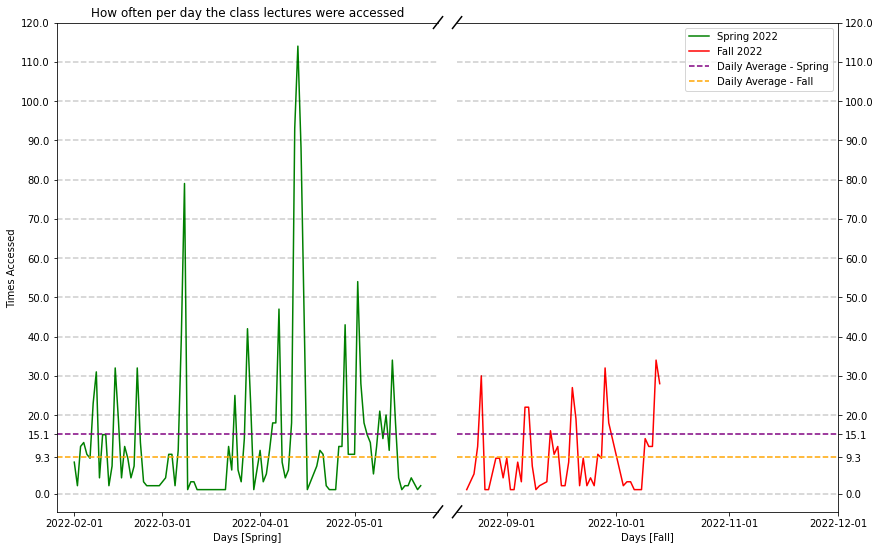

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, (ax,ax2) = plt.subplots(1,2,figsize=(14,9),sharey=True)
ax.plot(x1.index.to_list(),x1.to_list(),label="Spring 2022",color="green")
ax2.plot(color='green',label="Spring 2022")
ax2.plot(x2.index.to_list(),x2.to_list(),label="Fall 2022",color="red")


ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

fig.subplots_adjust(wspace = 0.05)

#spring avg
ax2.axhline(y=x1.mean(),color="purple", label='Daily Average - Spring',linestyle='--' )
ax.axhline(y=x1.mean(),color="purple", linestyle='--' )

#fall avg
ax2.axhline(y=x2.mean(),color="orange", label='Daily Average - Fall ',linestyle='--' )
ax.axhline(y=x2.mean(),color="orange", linestyle='--' )

#guidelines
for i in range(0,120,10):
    if i==10:
        continue
    ax.axhline(y=i,color="black",linestyle="--",alpha=.2)
    ax2.axhline(y=i,color="black",linestyle="--",alpha=.2)

ax.set_title('How often per day the class lectures were accessed')
ax.set_xticks(['2022-02-01','2022-03-01','2022-04-01','2022-05-01'])
ax2.set_xticks(['2022-09-01','2022-10-01','2022-11-01','2022-12-01'])
ax.set_yticks([0,x1.mean(),x2.mean(),20,30,40,50,60,70,80,90,100,110,120])

#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(handles=handles,loc='upper right')

ax.set_xlabel('Days [Spring]')        
ax2.set_xlabel('Days [Fall]')   
ax.set_ylabel('Times Accessed')

plt.show()

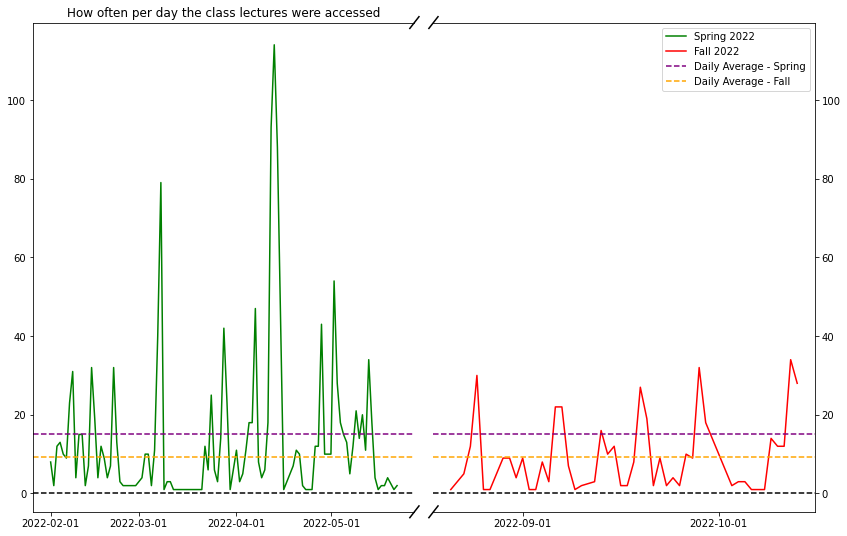

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#colors = ["green", "red","purple","orange"]
#texts = ["Spring 2022", " Fall 2022","Spring 2022 average access/day","Fall 2022 average access/day"]

fig, (ax,ax2) = plt.subplots(1,2,figsize=(14,9),sharey=True)
ax.plot(x1.index.to_list(),x1.to_list(),label="Spring 2022",color="green")
ax2.plot(color='green',label="Spring 2022")
ax2.plot(x2.index.to_list(),x2.to_list(),label="Fall 2022",color="red")


ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

fig.subplots_adjust(wspace = 0.05)


#spring avg
ax2.axhline(y=x1.mean(),color="purple", label='Daily Average - Spring',linestyle='--' )
ax.axhline(y=x1.mean(),color="purple", linestyle='--' )


#fall avg
ax2.axhline(y=x2.mean(),color="orange", label='Daily Average - Fall ',linestyle='--' )
ax.axhline(y=x2.mean(),color="orange", linestyle='--' )


# line at y=0
ax.axhline(y=0,color="black",linestyle="--")
ax2.axhline(y=0,color="black",linestyle="--")



ax.set_title('How often per day the class lectures were accessed')
ax.set_xticks(['2022-02-01','2022-03-01','2022-04-01','2022-05-01'])
ax2.set_xticks(['2022-09-01','2022-10-01',]) #'2022-11-01','2022-12-01'])


#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(handles=handles,loc='upper right')



plt.show()

In [11]:
a1_list=[]
a2_list=[]
for a1,b1 in enumerate(x1.to_list()):
    a1_list.append(a1)

for a2,b2 in enumerate(x2.to_list()):
    a2_list.append(a2)


In [12]:
x1.to_list

<bound method IndexOpsMixin.tolist of 2022-02-01     8
2022-02-02     2
2022-02-03    12
2022-02-04    13
2022-02-05    10
              ..
2022-05-17     2
2022-05-18     2
2022-05-19     4
2022-05-21     1
2022-05-22     2
Name: date, Length: 96, dtype: int64>

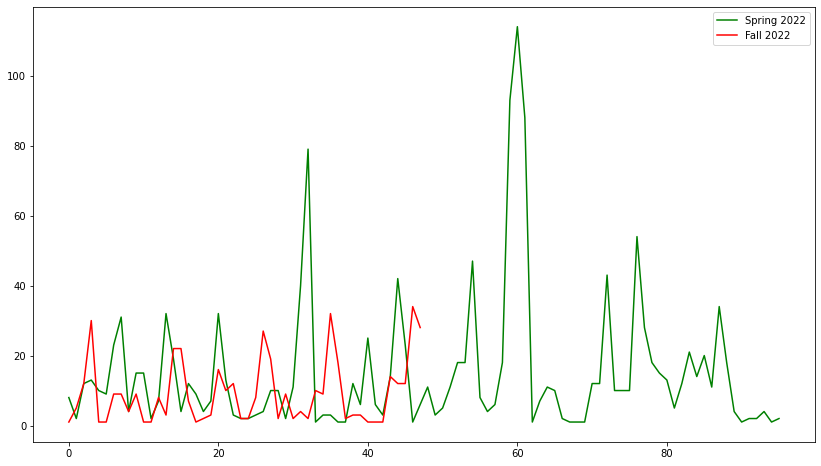

In [211]:
fig,ax=plt.subplots(figsize=(14,8))


ax.plot(a1_list,x1.to_list(),label="Spring 2022",color="green")
ax.plot(a2_list,x2.to_list(),label="Fall 2022",color="red")

ax.legend()
plt.show()

In [28]:
for i in range(0,120,20):
    print(i)

0
20
40
60
80
100


In [27]:
range?